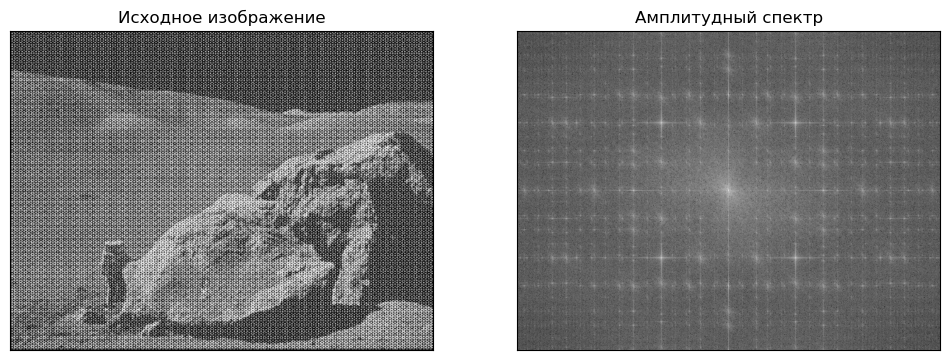

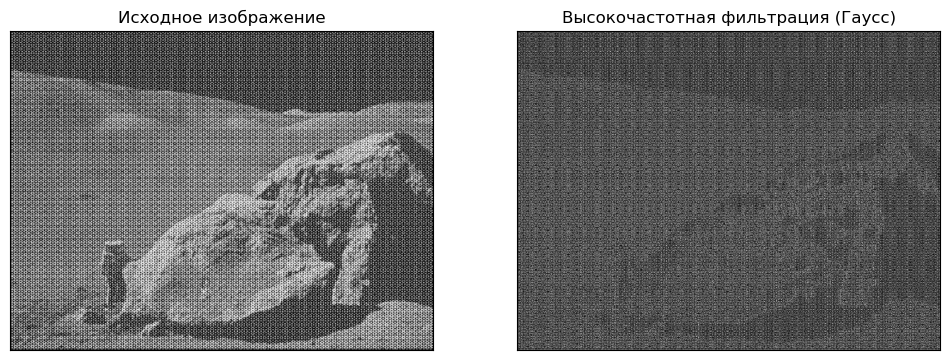

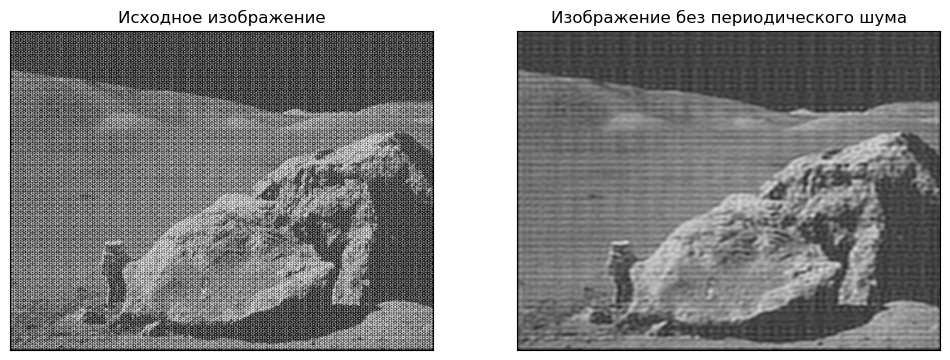

In [22]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from skimage.feature import peak_local_max

img = cv.imread('periodic_noise.jpg', cv.IMREAD_GRAYSCALE)

dft = cv.dft(np.float32(img), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20 * np.log(cv.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

#Визуализация исходного изображения и амплитудного спектра
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Исходное изображение'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Амплитудный спектр'), plt.xticks([]), plt.yticks([])
plt.show()

#Высокочастотная фильтрация на основе ядра Гаусса
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
sigma = 30

#Создание Гауссова ядра
x = np.arange(0, cols, 1)
y = np.arange(0, rows, 1)
X, Y = np.meshgrid(x, y)
gaussian_mask = np.exp(-((X - ccol)**2 + (Y - crow)**2) / (2 * sigma**2))

high_pass_mask = 1 - gaussian_mask

# Применение высокочастотного фильтра
dft_shift_high_pass = dft_shift * high_pass_mask[:, :, np.newaxis]
f_ishift_high_pass = np.fft.ifftshift(dft_shift_high_pass)
img_back_high_pass = cv.idft(f_ishift_high_pass)
img_back_high_pass = cv.magnitude(img_back_high_pass[:, :, 0], img_back_high_pass[:, :, 1])

plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Исходное изображение'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_back_high_pass, cmap='gray')
plt.title('Высокочастотная фильтрация (Гаусс)'), plt.xticks([]), plt.yticks([])
plt.show()

min_distance = 10 
threshold_abs = 270
noise_coords = peak_local_max(magnitude_spectrum, min_distance=min_distance, threshold_abs=threshold_abs)

mask_noise = np.ones_like(dft_shift)
radius = 81
for coord in noise_coords:
    cv.circle(mask_noise, (coord[1], coord[0]), radius, (0, 0), -1)

cv.circle(mask_noise, (ccol, crow), radius + 12, (0, 0), -1)
cv.circle(mask_noise, (ccol, crow), radius - 12, (1, 1), -1)

dft_shift_noise_removed = dft_shift * mask_noise
f_ishift_noise_removed = np.fft.ifftshift(dft_shift_noise_removed)
img_back_noise_removed = cv.idft(f_ishift_noise_removed)
img_back_noise_removed = cv.magnitude(img_back_noise_removed[:, :, 0], img_back_noise_removed[:, :, 1])

img_back_noise_removed = cv.normalize(img_back_noise_removed, None, 0, 255, cv.NORM_MINMAX)

plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Исходное изображение'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_back_noise_removed, cmap='gray')
plt.title('Изображение без периодического шума'), plt.xticks([]), plt.yticks([])
plt.show()